# Workshop 7. Neural Network

## 1. Logistic Regression
#### 1. Prediction function for logistic regression
$$
h_\theta(x)=\frac{1}{1+e^{-\theta^T x}}
$$

#### 2. Cost function
$$
\begin{aligned}
&J(\theta)=-\frac{1}{m}\left[\sum_{i=1}^m y^i \log h_\theta\left(x^i\right)+\left(1-y^i\right) \log \left(1-h_\theta\left(x^i\right)\right)\right]
\end{aligned}
$$

#### 3. Gradient Descent
$$
\theta_j:=\theta_j-\alpha \frac{1}{m} \sum_{i=1}^m\left(h_\theta\left(x^i\right)-y^i\right) x_j^i
$$

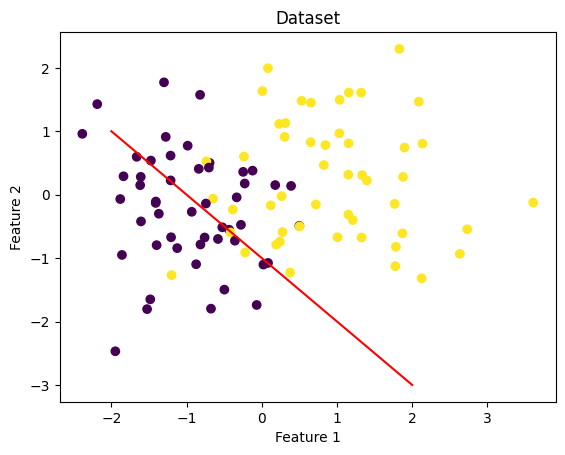

In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

# Generate classification dataset
x, y = make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1,random_state=2043)
X = np.concatenate((np.ones((x.shape[0],1)),x),axis=1) # adding bias [1]
theta = np.ones((X.shape[1],1)) #setting the weights


b_x = [val for val in range(-2,3)]
b_y = ((-theta[0]-b_x*theta[1])/theta[2])


plt.title("Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.scatter(x[:,0], x[:,1], c=y)
plt.plot(b_x,b_y,c = "r")

In [2]:
epoch = 1000
learning_rate = 0.01
m = len(y)
y = y.reshape(-1,1) #y.reshape(len(y)/2,1)
theta = np.ones((X.shape[1],1))
y_pred = (1/(1+np.exp(X@theta))) # X.dot(theta)


loss_lst = []

for itr in range(epoch):
    lg = np.log(y_pred)
    lg_2 = np.log(1-y_pred)
    loss = (-1/m*sum(y*lg+(1-y)*lg_2))
    loss_lst.append(loss)
    
    theta -= ((learning_rate/m) *((X.T)@(y - y_pred)))  # X.T, x is transposed
    y_pred = (1/(1+np.exp(X@theta)))
    
new_b_x = [val for val in range(-2,3)]
new_b_y = ((-theta[0]-b_x*theta[1])/theta[2])

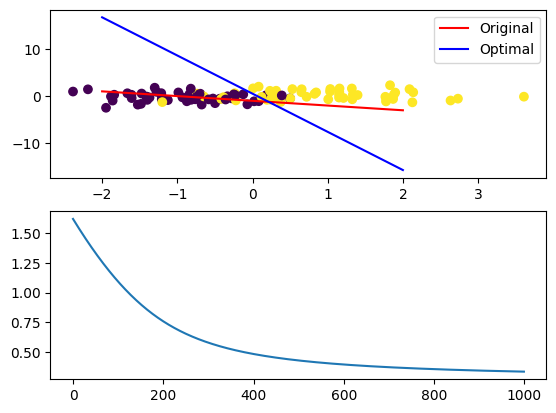

In [3]:
plt.subplot(2,1,1)
plt.scatter(x[:,0], x[:,1], c=y)
plt.plot(b_x,b_y,label = "Original" , c="r") # previous line
plt.plot(new_b_x,new_b_y,label = "Optimal", c ="b") # new line
plt.legend() # to show label
plt.subplot(2,1,2)
plt.plot(loss_lst)

## 2. Neural Network
### 2.1 Forward Propagation
Forward propagation is where input data is fed through a network, in a forward direction, to generate an output.
#### Exercise 1. Could you design scripts to compute the output of the following neural network?

In [4]:
#'''
# EX 1 :
x_1 = 0.3
x_2 = 0.7
x_3 = 0.2

t_1 = 0.5
t_2 = 0.2
t_3 = 0.3

res = (x_1*t_1)+(x_2*t_2)+(x_3*t_3)
print("Result: ", res)
#'''

Result:  0.35


In [5]:
#'''
# EX 1 :
x = np.array ([0.3,0.7,0.2]).reshape(1,3)
t = np.array ([0.5,0.2,0.3]).reshape(3,1)

res = x@t
print("Result: ", res)
#'''

Result:  [[0.35]]


In [6]:
#'''
# EX 2 :
x = np.array ([0.3,0.7]).reshape(1,-1)
weight_1 = np.array ([[0.5,0.2,0.4],[-0.3,-0.3,0.6]])
weight_2 = np.array ([0.5,-0.6,0.8]).reshape(-1,1)

print(x@weight_1@weight_2)

#'''

[[0.492]]


In [7]:
x = np.array ([0.3,0.7,0.2])
weight = np.array ([0.5,0.2,0.3])
z = x@weight
result = 1/(1+np.exp(-z))
print(result)

0.5866175789173301
